/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


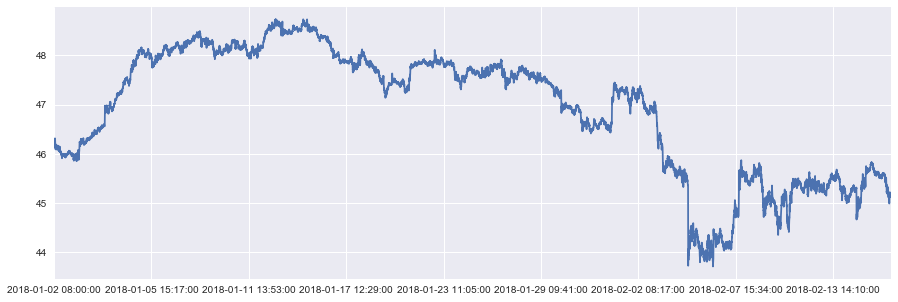

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

import networkx as nx
from statsmodels.tsa.stattools import adfuller

# read the data
# data = pd.read_csv('closing_prices_cleaned.csv')
data = pd.read_csv('closing_prices_cleaned.csv', index_col=0)

data.head()

plt.figure(figsize=(15,5))
data['FP FP Equity'].plot()

In [2]:
stocks = {'BNP Paribas': 'Bank', 'Carrefour': 'Food', 'Cement Roadstone Hold': 'Construction', 
          'Daimler': 'Automobiles', 'Danone': 'Food', 'Deutsche Bank': 'Bank', 'Deutsche Telekom': 'Telecommunications',
          'ENEL': 'Electricity', 'Engie': 'Electricity', 'ENI': 'Oil & Gas', 'EON': 'Electricity',
          'Essilor Intl': 'Health Care', 'Iberdrola': 'Electricity', 'Industria Textil': 'Personal Goods',
          'ING Group': 'Bank', 'Intesa SP': 'Bank', 'L’Oreal': 'Personal Goods', 'LVMH': 'Leisure Goods',
          'Munich RE': 'Insurance', 'Orange': 'Telecommunications', 'Philips': 'Electrical Equipment',
          'Repsol': 'Oil & Gas', 'RWE AG': 'Electricity', 'Saint Gobain': 'Construction', 'Sanofi': 'Pharmaceuticals',
          'SAP': 'Software', 'Schneider': 'Hardware', 'Siemens': 'Electrical Equipment', 'Societe Generale': 'Bank',
          'Telefonica SA': 'Telecommunications', 'Total': 'Oil & Gas', 'UniCredit': 'Bank',
          'Unilever': 'Household Goods', 'Vinci': 'Constructions', 'Vivendi': 'Telecommunications', 
          'Volkswagen': 'Automobiles', 'Air Liquide': 'Chemicals', 'Allianz SE': 'Insurance',
          'ABI': 'Food', 'Arcelor Mittal': 'Construction', 'ASML': 'Electrical Equipments',
          'Generali': 'Insurance', 'AXA': 'Insurance', 'BBVA': 'Bank', 'Santander': 'Bank', 'BASF': 'Chemicals',
          'Bayer': 'Pharmaceuticals', 'BMW': 'Automobiles'
         }

In [3]:
stocks

{'ABI': 'Food',
 'ASML': 'Electrical Equipments',
 'AXA': 'Insurance',
 'Air Liquide': 'Chemicals',
 'Allianz SE': 'Insurance',
 'Arcelor Mittal': 'Construction',
 'BASF': 'Chemicals',
 'BBVA': 'Bank',
 'BMW': 'Automobiles',
 'BNP Paribas': 'Bank',
 'Bayer': 'Pharmaceuticals',
 'Carrefour': 'Food',
 'Cement Roadstone Hold': 'Construction',
 'Daimler': 'Automobiles',
 'Danone': 'Food',
 'Deutsche Bank': 'Bank',
 'Deutsche Telekom': 'Telecommunications',
 'ENEL': 'Electricity',
 'ENI': 'Oil & Gas',
 'EON': 'Electricity',
 'Engie': 'Electricity',
 'Essilor Intl': 'Health Care',
 'Generali': 'Insurance',
 'ING Group': 'Bank',
 'Iberdrola': 'Electricity',
 'Industria Textil': 'Personal Goods',
 'Intesa SP': 'Bank',
 'LVMH': 'Leisure Goods',
 'L’Oreal': 'Personal Goods',
 'Munich RE': 'Insurance',
 'Orange': 'Telecommunications',
 'Philips': 'Electrical Equipment',
 'RWE AG': 'Electricity',
 'Repsol': 'Oil & Gas',
 'SAP': 'Software',
 'Saint Gobain': 'Construction',
 'Sanofi': 'Pharmaceutica

In [4]:
data.head()

,BNP FP Equity,CA FP Equity,CRH ID Equity,DAI GR Equity,BN FP Equity,DBK GR Equity,DTE GR Equity,ENEL IM Equity,ENGI FP Equity,ENI IM Equity,...,ABI BB Equity,MTS SM Equity,ASML NA Equity,G IM Equity,CS FP Equity,BBVA SM Equity,SAN SM Equity,BAS GR Equity,BAYN GR Equity,BMW GR Equity
2018-01-02 08:00:00,62.68,18.050000,29.9500,71.150000,69.95,15.901000,14.9300,5.135,14.365000,13.82,...,93.17,27.1000,145.00,15.20,24.770,7.137,5.522,92.300,104.400,86.800000
2018-01-02 08:01:00,62.64,18.061667,29.9125,71.163500,69.87,15.900667,14.9134,5.140,14.345000,13.83,...,93.18,27.0925,144.85,15.25,24.755,7.136,5.510,92.010,104.400,87.030000
2018-01-02 08:02:00,62.60,18.073333,29.8750,71.177000,69.80,15.900333,14.8968,5.140,14.330000,13.84,...,93.13,27.0850,144.50,15.26,24.775,7.139,5.505,91.996,104.400,87.260000
2018-01-02 08:03:00,62.49,18.085000,29.8375,71.153333,69.82,15.900000,14.8802,5.145,14.333333,13.86,...,93.15,27.1600,144.70,15.26,24.765,7.139,5.513,91.976,104.317,87.131333
2018-01-02 08:04:00,62.70,18.085000,29.8000,71.129667,69.58,15.925000,14.8636,5.145,14.336667,13.87,...,93.07,27.0700,144.65,15.27,24.785,7.131,5.520,91.953,104.234,87.002667


In [9]:
for s in stocks.keys():
    print(s)

BNP Paribas
Carrefour
Cement Roadstone Hold
Daimler
Danone
Deutsche Bank
Deutsche Telekom
ENEL
Engie
ENI
EON
Essilor Intl
Iberdrola
Industria Textil
ING Group
Intesa SP
L’Oreal
LVMH
Munich RE
Orange
Philips
Repsol
RWE AG
Saint Gobain
Sanofi
SAP
Schneider
Siemens
Societe Generale
Telefonica SA
Total
UniCredit
Unilever
Vinci
Vivendi
Volkswagen
Air Liquide
Allianz SE
ABI
Arcelor Mittal
ASML
Generali
AXA
BBVA
Santander
BASF
Bayer
BMW


In [10]:
data.columns = stocks.keys()

In [11]:
data.head()

,BNP Paribas,Carrefour,Cement Roadstone Hold,Daimler,Danone,Deutsche Bank,Deutsche Telekom,ENEL,Engie,ENI,...,ABI,Arcelor Mittal,ASML,Generali,AXA,BBVA,Santander,BASF,Bayer,BMW
2018-01-02 08:00:00,62.68,18.050000,29.9500,71.150000,69.95,15.901000,14.9300,5.135,14.365000,13.82,...,93.17,27.1000,145.00,15.20,24.770,7.137,5.522,92.300,104.400,86.800000
2018-01-02 08:01:00,62.64,18.061667,29.9125,71.163500,69.87,15.900667,14.9134,5.140,14.345000,13.83,...,93.18,27.0925,144.85,15.25,24.755,7.136,5.510,92.010,104.400,87.030000
2018-01-02 08:02:00,62.60,18.073333,29.8750,71.177000,69.80,15.900333,14.8968,5.140,14.330000,13.84,...,93.13,27.0850,144.50,15.26,24.775,7.139,5.505,91.996,104.400,87.260000
2018-01-02 08:03:00,62.49,18.085000,29.8375,71.153333,69.82,15.900000,14.8802,5.145,14.333333,13.86,...,93.15,27.1600,144.70,15.26,24.765,7.139,5.513,91.976,104.317,87.131333
2018-01-02 08:04:00,62.70,18.085000,29.8000,71.129667,69.58,15.925000,14.8636,5.145,14.336667,13.87,...,93.07,27.0700,144.65,15.27,24.785,7.131,5.520,91.953,104.234,87.002667


In [18]:
data.to_csv('data_renamed')

In [24]:
data = pd.read_csv('data_renamed')

In [25]:
data.head()

,Unnamed: 0,BNP Paribas,Carrefour,Cement Roadstone Hold,Daimler,Danone,Deutsche Bank,Deutsche Telekom,ENEL,Engie,...,ABI,Arcelor Mittal,ASML,Generali,AXA,BBVA,Santander,BASF,Bayer,BMW
0,2018-01-02 08:00:00,62.68,18.050000,29.9500,71.150000,69.95,15.901000,14.9300,5.135,14.365000,...,93.17,27.1000,145.00,15.20,24.770,7.137,5.522,92.300,104.400,86.800000
1,2018-01-02 08:01:00,62.64,18.061667,29.9125,71.163500,69.87,15.900667,14.9134,5.140,14.345000,...,93.18,27.0925,144.85,15.25,24.755,7.136,5.510,92.010,104.400,87.030000
2,2018-01-02 08:02:00,62.60,18.073333,29.8750,71.177000,69.80,15.900333,14.8968,5.140,14.330000,...,93.13,27.0850,144.50,15.26,24.775,7.139,5.505,91.996,104.400,87.260000
3,2018-01-02 08:03:00,62.49,18.085000,29.8375,71.153333,69.82,15.900000,14.8802,5.145,14.333333,...,93.15,27.1600,144.70,15.26,24.765,7.139,5.513,91.976,104.317,87.131333
4,2018-01-02 08:04:00,62.70,18.085000,29.8000,71.129667,69.58,15.925000,14.8636,5.145,14.336667,...,93.07,27.0700,144.65,15.27,24.785,7.131,5.520,91.953,104.234,87.002667
